In [1]:
from os import listdir
from os.path import isfile, join
import datetime

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt


%matplotlib inline

### Data - Restaurant Week 2018  (https://www.kaggle.com/popoandrew/restaurant-week-2018)

In [40]:
rstw_2018 = pd.read_csv('data/rstw_2018.csv')

# remove 57, 338 since they are not in yelp database
rstw_2018.drop(57, inplace=True)
rstw_2018.drop(338, inplace=True)
rstw_2018 = rstw_2018.reset_index(drop=True)
rstw_2018['postal_code'] = rstw_2018['postal_code'].fillna(0)

display(rstw_2018)

,name,street_address,google_map,review_count,phone,website,restaurant_type,average_review,food_review,service_review,...,star_1,star_2,star_3,star_4,star_5,description,restaurant_main_type,latitude,longitude,postal_code
0,Smoke Jazz and Supper Club,"2751 Broadway New York, NY 10025",//www.google.com/maps/search/?api=1&query=40.8...,2155,(212) 864-6662,http://www.smokejazz.com/,Contemporary American,4.421550,3.9,4.2,...,2,7,5,24,62,Smoke has augmented its reputation as one of M...,Contemporary American,40.801126,-73.968192,10025.0
1,Tavern on the Green,"1 Tavern on the Green New York, NY 10023",//www.google.com/maps/search/?api=1&query=40.7...,7029,(212) 877-8684,http://www.tavernonthegreen.com/,American,4.670290,4.4,4.4,...,1,2,6,19,72,Magical is a word thrown around a lot when dis...,American,40.772187,-73.977722,10023.0
2,ABC Kitchen,"35 East 18th Street New York, NY 10003",//www.google.com/maps/search/?api=1&query=40.7...,6031,(212) 475-5829,http://www.abckitchennyc.com/,Contemporary American,4.760310,4.6,4.4,...,1,2,5,15,77,ABC Kitchen with Jean-Georges: passionately co...,Contemporary American,40.737897,-73.989499,10003.0
3,Catch New York,"21 Ninth Avenue New York, NY 10014",//www.google.com/maps/search/?api=1&query=40.7...,4830,(212) 392-5978,http://www.catchhg.com/,Seafood,4.548300,4.6,4.2,...,3,2,6,15,74,CATCH features contemporary renditions of clas...,Seafood,40.740227,-74.006340,10014.0
4,Becco,"355 West 46th Street New York, NY 10010",//www.google.com/maps/search/?api=1&query=40.7...,18139,(212) 397-7597,http://www.becco-nyc.com/,Italian,4.418139,4.4,4.4,...,1,3,9,27,60,Lidia Bastianich & her son Joe's Theater Distr...,Italian,40.760804,-73.989832,10010.0
5,Estiatorio Milos - NY,"125 West 55th Street New York, NY 10019",//www.google.com/maps/search/?api=1&query=40.7...,4404,(212) 245-7400,http://www.estiatoriomilos.com/,Seafood,4.844040,4.8,4.6,...,1,1,3,14,81,"The freshest, most flavorful fish, vegetables ...",Seafood,40.763598,-73.978951,10019.0
6,Tao Uptown,"42 East 58th Street New York, NY 10022",//www.google.com/maps/search/?api=1&query=40.7...,10600,(212) 888-2288,http://www.taorestaurant.com/,Asian,4.610600,4.5,4.4,...,1,2,7,21,69,"A 16-foot Buddha, which floats above a reflect...",Asian,40.762607,-73.971478,10022.0
7,Red Rooster Harlem,"310 Lenox Avenue New York, NY 10027",//www.google.com/maps/search/?api=1&query=40.8...,5682,(212) 792-9001,http://redroosterharlem.com/,Southern,4.456820,4.4,4.2,...,2,3,10,24,61,"Located in the heart of Harlem, Red Rooster se...",Other,40.808057,-73.944914,10027.0
8,Del Frisco's Double Eagle Steak House - New Yo...,"1221 Avenue of the Americas New York, NY 10020",//www.google.com/maps/search/?api=1&query=40.7...,7225,(212) 575-5129,http://delfriscos.com/,Steakhouse,4.772250,4.6,4.7,...,1,2,5,16,76,A midtown classic with sprawling views of the ...,Steakhouse,40.759425,-73.982222,10020.0
9,FIG & OLIVE Fifth Avenue,"10 East 52nd Street New York, NY 10021",//www.google.com/maps/search/?api=1&query=40.7...,7186,(212) 319-2002,http://www.figandolive.com/,Mediterranean,4.571860,4.5,4.3,...,1,3,7,25,64,FIG & OLIVE is about passion for the best oliv...,Mediterranean,40.759280,-73.975634,10021.0


In [41]:
rstw_2018.columns

Index(['name', 'street_address', 'google_map', 'review_count', 'phone',
       'website', 'restaurant_type', 'average_review', 'food_review',
       'service_review', 'ambience_review', 'value_review', 'price_range',
       'star_1', 'star_2', 'star_3', 'star_4', 'star_5', 'description',
       'restaurant_main_type', 'latitude', 'longitude', 'postal_code'],
      dtype='object')

### Yelp Data - download from Yelp API

In [42]:
yelp_rsts = pd.read_csv("data/yelp_rst_2019.csv")
print(yelp_rsts.shape)
yelp_rsts.head()

(346, 16)


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,smoke-jazz-and-supper-club-new-york-2,"[{'alias': 'jazzandblues', 'title': 'Jazz & Bl...","{'latitude': 40.8012384, 'longitude': -73.9681...",(212) 864-6662,5.912356,trbr9pYDDmXCj9z8m2d6LQ,https://s3-media2.fl.yelpcdn.com/bphoto/mtoknH...,False,"{'address1': '2751 Broadway', 'address2': None...",Smoke Jazz & Supper Club,1.212865e+10,$$,4.0,352,"['pickup', 'delivery']",https://www.yelp.com/biz/smoke-jazz-and-supper...
1,tavern-on-the-green-new-york-7,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.772194, 'longitude': -73.9776}",(212) 877-8684,20.401585,hKdvsbuQRtjajWYwjaoOQw,https://s3-media1.fl.yelpcdn.com/bphoto/fBgjO7...,False,"{'address1': '67 Central Park W', 'address2': ...",Tavern on the Green,1.212878e+10,$$$,3.5,1240,[],https://www.yelp.com/biz/tavern-on-the-green-n...
2,abc-kitchen-new-york,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.738085, 'longitude': -73.989472}",(212) 475-5829,39.424873,dMhRafXdr765DHe0k-QfaQ,https://s3-media2.fl.yelpcdn.com/bphoto/k2V0Qy...,False,"{'address1': '35 E 18th St', 'address2': '', '...",ABC Kitchen,1.212476e+10,$$$,4.0,2866,[],https://www.yelp.com/biz/abc-kitchen-new-york?...
3,catch-new-york-new-york,"[{'alias': 'advertising', 'title': 'Advertisin...","{'latitude': 40.74681, 'longitude': -73.98442}",(212) 715-8700,1994.761480,7mB_COyhOY1k01JcOu-wTw,https://s3-media4.fl.yelpcdn.com/bphoto/q1THJC...,False,"{'address1': '15 E 32nd St', 'address2': '4th ...",Catch -New York,1.212716e+10,NaN,3.5,37,[],https://www.yelp.com/biz/catch-new-york-new-yo...
4,becco-new-york-4,"[{'alias': 'italian', 'title': 'Italian'}]","{'latitude': 40.76083, 'longitude': -73.98981}",(212) 397-7597,3.072498,QObHX0yR6zd0WfksRDbJTA,https://s3-media3.fl.yelpcdn.com/bphoto/w5_bcc...,False,"{'address1': '355 W 46th St', 'address2': '', ...",Becco,1.212398e+10,$$$,3.5,2680,[],https://www.yelp.com/biz/becco-new-york-4?adju...


In [43]:
yelp_rsts.columns

Index(['alias', 'categories', 'coordinates', 'display_phone', 'distance', 'id',
       'image_url', 'is_closed', 'location', 'name', 'phone', 'price',
       'rating', 'review_count', 'transactions', 'url'],
      dtype='object')

### Yelp Restaurant Reviews  - Scrape from Yelp website

In [60]:
Bronx = set([10453, 10457, 10460, 10458, 10467, 10468, 
             10451, 10452, 10456, 10454, 10455, 10459, 
             10474, 10463, 10471, 10466, 10469, 10470, 
             10475, 10461, 10462,10464, 10465, 10472, 
             10473])


Brooklyn = set([11212, 11213, 11216, 11233, 11238, 11209,
                11214, 11228, 11204, 11218, 11219, 11230, 
                11234, 11236, 11239, 11223, 11224, 11229, 
                11235, 11201, 11205, 11215, 11217, 11231, 
                11203, 11210, 11225, 11226, 11207, 11208,
                11211, 11222, 11220, 11232, 11206, 11221, 11237])

# Manhattan
Harlem = set([10026, 10027, 10030, 10037, 10039, 10029, 10035])
ChelseaandClinton = set([10001, 10011, 10018, 10019, 10020, 10036])
GramercyParkandMurrayHill = set([10010, 10016, 10017, 10022])
GreenwichVillageandSoho = set([10012, 10013, 10014])
LowerManhattan = set([10004, 10005, 10006, 10007, 10038, 10280])
LowerEastSide = set([10002, 10003, 10009])
UpperEastSide = set([10021, 10028, 10044, 10065, 10075, 10128])
UpperWestSide = set([10023, 10024, 10025])
InwoodandWashingtonHeights = set([10031, 10032, 10033, 10034, 10040])

Queens = set([11361, 11362, 11363, 11364, 11354, 11355, 11356, 11357, 
           11358, 11359, 11360, 11365, 11366, 11367, 11412, 11423, 
           11432, 11433, 11434, 11435, 11436, 11101, 11102, 11103, 
           11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 
           11692, 11693, 11694, 11695, 11697, 11004, 11005, 11411, 
           11413, 11422, 11426, 11427, 11428, 11429, 11414, 11415, 
           11416, 11417, 11418, 11419, 11420, 11421, 11368, 11369, 
           11370, 11372, 11373, 11377, 11378])

StatenIsland = set([10302, 10303, 10310, 10306, 10307, 10308, 10309, 10312, 10301, 10304, 10305, 10314])


def getLocationFromZip(zipcode):
    if zipcode in Bronx:
        return "Bronx"
    if zipcode in Brooklyn:
        return "Brooklyn"
    if zipcode in Harlem:
        return "Harlem"
    if zipcode in ChelseaandClinton:
        return "Chelsea and Clinton"
    if zipcode in GramercyParkandMurrayHill:
        return "Gramercy Park and Murray Hill"
    if zipcode in GreenwichVillageandSoho:
        return "Greenwich Village and Soho"
    if zipcode in LowerManhattan:
        return "Lower Manhattan"
    if zipcode in LowerEastSide:
        return "Lower East Side"
    if zipcode in UpperEastSide:
        return "Upper East Side"
    if zipcode in UpperWestSide:
        return "Upper West Side"
    if zipcode in InwoodandWashingtonHeights:
        return "Inwood and Washington Heights"
    if zipcode in Queens:
        return "Queens"
    if zipcode in StatenIsland:
        return 'Staten Island'
    
    return "Other"

In [61]:
def parseReviews():
    dir_path = "data/reviews"
    review_files = [f for f in listdir(dir_path) if f.endswith('.csv') and isfile(join(dir_path, f))]
    review_files.sort()

    rst_week_start = datetime.date(2018, 7, 23)
    rst_week_end = datetime.date(2018, 8, 17)

    results = pd.DataFrame(data=[], columns=['alias', 'cur_rating', 'review_count', 'avg_rating', 'rating_1s', 'rating_2s', 'rating_3s', 'rating_4s', 'rating_5s', 
                                             'rw_review_count', 'rw_avg_rating', 'rw_rating_1s', 'rw_rating_2s', 'rw_rating_3s', 'rw_rating_4s', 'rw_rating_5s',
                                            'price_range', 'restaurant_main_type', 'district']) 
    for f in review_files:
        print(f)
        idx = int(f.split('_')[0])
        reviews = pd.read_csv(join(dir_path, f))
        reviews['time_created'] = pd.to_datetime(reviews['time_created'])

        row = []
        row.append(yelp_rsts.loc[idx]['alias'])
        row.append(yelp_rsts.loc[idx]['rating'])
        row.append(reviews.shape[0])
        row.append(round(reviews['rating'].mean(), 2))
        for i in range(1, 6):
            row.append(reviews[reviews['rating'] == i].shape[0])

        rw_reviews = reviews[(rst_week_start <= reviews['time_created']) & (reviews['time_created'] <= rst_week_end)]
        row.append(rw_reviews['rating'].shape[0])
        row.append(round(rw_reviews['rating'].mean(), 2))
        for i in range(1, 6):
            row.append(rw_reviews[rw_reviews['rating'] == i].shape[0])
        row.append(rstw_2018.loc[idx]['price_range'])
        row.append(rstw_2018.loc[idx]['restaurant_main_type'])
        row.append(getLocationFromZip(int(rstw_2018.loc[idx]['postal_code'])))
                   
        results.loc[idx] = pd.Series(row, index=results.columns)

    display(results)
    results.to_csv("data/review_analysis.csv")

In [62]:
parseReviews()

000_smoke_jazz_and_supper_club_new_york_2.csv
001_tavern_on_the_green_new_york_7.csv


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.


002_abc_kitchen_new_york.csv
003_catch_new_york_new_york.csv
004_becco_new_york_4.csv
005_estiatorio_milos_new_york.csv
006_tao_uptown_new_york.csv
007_red_rooster_harlem_new_york_3.csv
008_del_friscos_double_eagle_steakhouse_new_york.csv
009_fig_and_olive_fifth_ave_new_york_4.csv
010_rosa_mexicano_new_york_6.csv
011_abc_cocina_new_york.csv
012_gallaghers_steakhouse_new_york.csv
013_boulud_sud_new_york.csv
014_nougatine_at_jean_georges_new_york_3.csv
015_sarabeths_new_york_10.csv
016_tao_downtown_new_york_2.csv
017_ilili_new_york_2.csv
018_scarpetta_new_york.csv
019_atlantic_grill_new_york_3.csv
020_empellón_new_york_3.csv
021_ocean_prime_new_york.csv
022_sarabeths_west_new_york.csv
024_toloache_50_new_york.csv
025_blue_fin_new_york.csv
026_bar_boulud_new_york_2.csv
027_hakkasan_new_york.csv
028_lincoln_ristorante_new_york.csv
029_cafe_boulud_new_york_4.csv
030_the_view_restaurant_and_lounge_new_york.csv
031_park_avenue_autumn_winter_spring_summer_new_york_3.csv
032_zuma_new_york_2.cs

246_michael_jordans_the_steak_house_nyc_new_york_2.csv
247_beauty_and_essex_new_york.csv
248_the_mercer_kitchen_new_york_6.csv
249_the_dutch_new_york.csv
250_lafayette_new_york_2.csv
251_vandal_new_york.csv
252_gotham_bar_and_grill_new_york.csv
253_il_buco_alimentari_and_vineria_new_york_2.csv
254_bar_primi_new_york_3.csv
255_lure_fishbar_new_york_2.csv
256_nix_new_york.csv
257_lupa_new_york.csv
258_claudette_new_york.csv
259_empellón_taqueria_new_york.csv
260_perry_st_new_york.csv
261_boucherie_west_village_new_york_3.csv
262_indochine_new_york.csv
263_el_vez_new_york.csv
264_public_kitchen_new_york_2.csv
265_tamarind_new_york_4.csv
266_the_stanton_social_new_york.csv
267_hearth_new_york.csv
268_sarabeths_tribeca_new_york.csv
269_leuca_brooklyn.csv
270_sant_ambroeus_new_york_4.csv
271_il_cantinori_new_york.csv
272_mr_chow_new_york.csv
273_narcissa_new_york.csv
274_il_mulino_new_york_downtown_new_york_2.csv
275_sant_ambroeus_new_york.csv
276_pig_and_khao_new_york.csv
277_little_park_n

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type,district
0,smoke-jazz-and-supper-club-new-york-2,4.0,350,3.78,30,32,44,122,122,5,2.20,1,2,2,0,0,$31 to $50,Contemporary American,Upper West Side
1,tavern-on-the-green-new-york-7,3.5,1238,3.38,208,163,192,304,371,29,3.86,1,5,4,6,13,$31 to $50,American,Upper West Side
2,abc-kitchen-new-york,4.0,2855,4.09,101,169,359,969,1257,20,3.80,3,2,2,2,11,$31 to $50,Contemporary American,Lower East Side
3,catch-new-york-new-york,3.5,36,3.44,9,2,4,6,15,1,1.00,1,0,0,0,0,$31 to $50,Seafood,Greenwich Village and Soho
4,becco-new-york-4,3.5,2674,3.73,211,261,462,857,883,16,4.12,0,3,1,3,9,$30 and under,Italian,Gramercy Park and Murray Hill
5,estiatorio-milos-new-york,4.0,827,3.99,42,62,106,271,346,12,4.42,0,0,2,3,7,$50 and over,Seafood,Chelsea and Clinton
6,tao-uptown-new-york,3.5,2449,3.55,219,267,521,822,620,12,3.67,2,0,2,4,4,$31 to $50,Asian,Gramercy Park and Murray Hill
7,red-rooster-harlem-new-york-3,3.5,2939,3.53,273,420,573,828,845,36,3.78,3,6,4,6,17,$31 to $50,Other,Harlem
8,del-friscos-double-eagle-steakhouse-new-york,4.5,2751,4.29,89,127,276,657,1602,44,4.41,1,1,6,7,29,$50 and over,Steakhouse,Chelsea and Clinton
9,fig-and-olive-fifth-ave-new-york-4,3.5,1098,3.57,89,124,203,432,250,13,3.77,0,2,4,2,5,$31 to $50,Mediterranean,Upper East Side


In [63]:
analysis = pd.read_csv("data/review_analysis.csv", index_col=0)
print(analysis.shape)
analysis.head()

(345, 19)


,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type,district
0,smoke-jazz-and-supper-club-new-york-2,4.0,350,3.78,30,32,44,122,122,5,2.20,1,2,2,0,0,$31 to $50,Contemporary American,Upper West Side
1,tavern-on-the-green-new-york-7,3.5,1238,3.38,208,163,192,304,371,29,3.86,1,5,4,6,13,$31 to $50,American,Upper West Side
2,abc-kitchen-new-york,4.0,2855,4.09,101,169,359,969,1257,20,3.80,3,2,2,2,11,$31 to $50,Contemporary American,Lower East Side
3,catch-new-york-new-york,3.5,36,3.44,9,2,4,6,15,1,1.00,1,0,0,0,0,$31 to $50,Seafood,Greenwich Village and Soho
4,becco-new-york-4,3.5,2674,3.73,211,261,462,857,883,16,4.12,0,3,1,3,9,$30 and under,Italian,Gramercy Park and Murray Hill


### Profiling Restaurant Week 2018 Summer

In [12]:
def getRatios(dataframe, column):
    items = dataframe[column].unique()
    labels = []
    ratios = []
    counts = []
    for item in items:
        labels.append(item.replace('$', '\$'))
        counts.append(dataframe[dataframe[column] == item].shape[0])
        ratios.append(counts[-1] / dataframe.shape[0])

    return labels, ratios, counts

#### price

['\\$31 to \\$50', '\\$30 and under', '\\$50 and over']
[0.661849710982659, 0.1531791907514451, 0.18497109826589594]
[229, 53, 64]


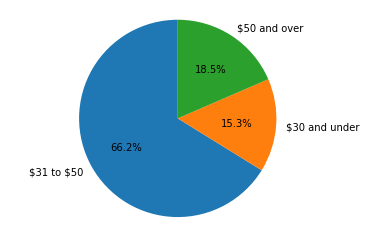

In [13]:
labels, ratios, counts = getRatios(rstw_2018, 'price_range')
print(labels)
print(ratios)
print(counts)
fig, ax = plt.subplots()
ax.pie(ratios, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Main Type

['Contemporary American', 'American', 'Seafood', 'Italian', 'Asian', 'Other', 'Steakhouse', 'Mediterranean', 'Mexican', 'French', 'Chinese', 'Japanese & Koren', 'Spanish', 'Other Europe', 'Greek', 'Southeast Asian', 'Indian']
[0.08670520231213873, 0.14739884393063585, 0.03757225433526012, 0.2138728323699422, 0.014450867052023121, 0.05491329479768786, 0.11849710982658959, 0.031791907514450865, 0.05491329479768786, 0.08670520231213873, 0.023121387283236993, 0.046242774566473986, 0.023121387283236993, 0.017341040462427744, 0.011560693641618497, 0.014450867052023121, 0.017341040462427744]
[30, 51, 13, 74, 5, 19, 41, 11, 19, 30, 8, 16, 8, 6, 4, 5, 6]


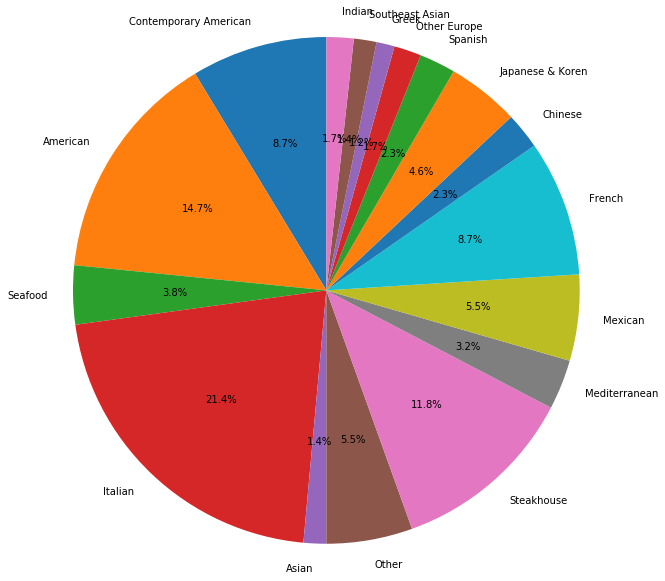

In [14]:
labels, ratios, counts = getRatios(rstw_2018, 'restaurant_main_type')
print(labels)
print(ratios)
print(counts)
fig, ax = plt.subplots(figsize=[10, 10])
ax.pie(ratios, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Location

['Upper West Side', 'Lower East Side', 'Greenwich Village and Soho', 'Gramercy Park and Murray Hill', 'Chelsea and Clinton', 'Harlem', 'Upper East Side', 'Other', 'Inwood and Washington Heights', 'Queens', 'Lower Manhattan', 'Brooklyn', 'Staten Island']
[0.057971014492753624, 0.11304347826086956, 0.14492753623188406, 0.22318840579710145, 0.2956521739130435, 0.008695652173913044, 0.05217391304347826, 0.043478260869565216, 0.002898550724637681, 0.002898550724637681, 0.03768115942028986, 0.014492753623188406, 0.002898550724637681]
[20, 39, 50, 77, 102, 3, 18, 15, 1, 1, 13, 5, 1]


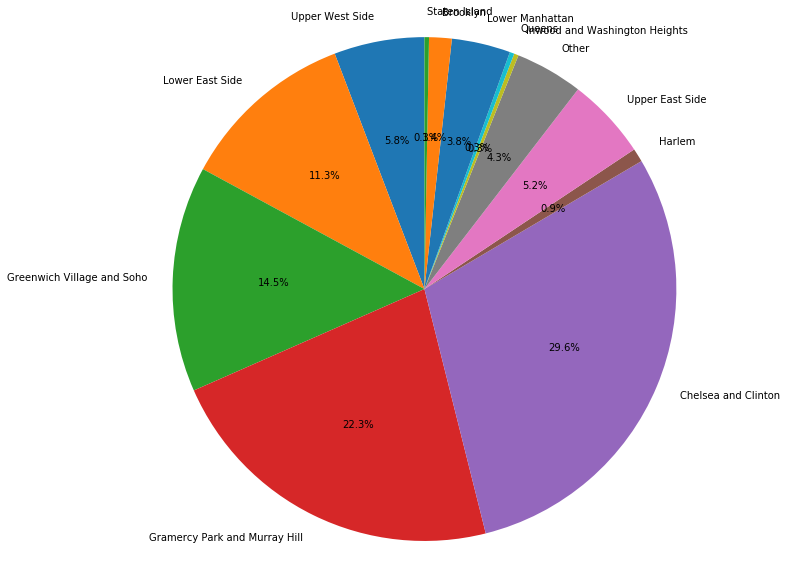

In [65]:
labels, ratios, counts = getRatios(analysis, 'district')
print(labels)
print(ratios)
print(counts)
fig, ax = plt.subplots(figsize=[10, 10])
ax.pie(ratios, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### No review on rst week

In [9]:
no_reviews = analysis[analysis['rw_review_count'] == 0]
print(no_reviews.shape[0])
display(no_reviews)

18


,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s
141,etcetera-etcetera-new-york,4.0,406,3.97,17,30,63,136,160,0,NaN,0,0,0,0,0
142,cafe-centro-new-york-8,3.5,149,3.47,7,24,40,48,30,0,NaN,0,0,0,0,0
165,cipriani-new-york-2,3.5,99,3.56,15,8,14,31,31,0,NaN,0,0,0,0,0
174,delmonicos-kitchen-new-york-3,3.5,321,3.49,33,49,63,81,95,0,NaN,0,0,0,0,0
184,tarallucci-e-vino-upper-west-side-new-york,3.5,111,3.67,10,9,25,31,36,0,NaN,0,0,0,0,0
203,nick-and-stefs-steakhouse-new-york,3.5,204,3.45,21,26,48,58,51,0,NaN,0,0,0,0,0
212,haru-sushi-new-york-18,3.5,73,3.27,14,9,12,19,19,0,NaN,0,0,0,0,0
237,triomphe-new-york-2,3.5,132,3.60,10,17,24,46,35,0,NaN,0,0,0,0,0
242,the-morgan-dining-room-new-york,4.0,23,3.83,0,3,3,12,5,0,NaN,0,0,0,0,0
243,montebello-ristorante-italiano-new-york,3.5,83,3.33,11,10,17,31,14,0,NaN,0,0,0,0,0


In [145]:
best_rstw = analysis[analysis['rw_review_count'] >= 10].sort_values(['rw_avg_rating', 'avg_rating'], ascending=False)
best_rstw

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type
255,lure-fishbar-new-york-2,4.0,1554,3.86,73,120,256,613,492,11,4.73,0,0,1,1,9,$31 to $50,Seafood
286,delmonicos-new-york,4.0,968,3.80,53,100,169,315,331,11,4.73,0,0,0,3,8,$50 and over,Steakhouse
67,the-metropolitan-museum-of-art-new-york-3,4.5,2613,4.74,40,24,75,298,2176,16,4.69,0,0,1,3,12,$50 and over,Contemporary American
96,the-seafire-grill-new-york-4,4.5,1058,4.40,25,44,82,236,671,21,4.57,1,0,1,3,16,$31 to $50,Seafood
21,ocean-prime-new-york,4.5,481,4.42,13,22,33,96,317,24,4.42,0,2,2,4,16,$31 to $50,Seafood
5,estiatorio-milos-new-york,4.0,827,3.99,42,62,106,271,346,12,4.42,0,0,2,3,7,$50 and over,Seafood
331,greenwich-steakhouse-new-york,4.5,207,4.46,16,9,5,11,166,17,4.41,0,3,0,1,13,$50 and over,Steakhouse
8,del-friscos-double-eagle-steakhouse-new-york,4.5,2751,4.29,89,127,276,657,1602,44,4.41,1,1,6,7,29,$50 and over,Steakhouse
295,temple-court-new-york,3.5,179,3.66,21,21,27,38,72,13,4.31,0,1,3,0,9,$31 to $50,American
149,trattoria-zero-otto-nove-bronx,4.0,700,4.08,31,51,78,211,329,10,4.30,0,1,1,2,6,$31 to $50,Italian


In [148]:
better = analysis[(analysis['rw_review_count'] != 0) & (analysis['rw_avg_rating'] - analysis['avg_rating'] >= 0.05)]
better.groupby(['restaurant_main_type']).count()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range
restaurant_main_type,,,,,,,,,,,,,,,,,
American,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Asian,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Chinese,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Contemporary American,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
French,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Greek,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Indian,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Italian,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
Japanese & Koren,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [147]:
even_better = better[(better['rw_avg_rating'] >= 4) & (better['rw_review_count'] >= 10)].sort_values(['rw_avg_rating', 'avg_rating'], ascending=False)
even_better.groupby(['restaurant_main_type']).count()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range
restaurant_main_type,,,,,,,,,,,,,,,,,
American,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Asian,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
French,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Italian,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Japanese & Koren,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Mexican,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Other,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Seafood,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Spanish,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [150]:
worse = analysis[(analysis['rw_review_count'] != 0) & (analysis['rw_avg_rating'] - analysis['avg_rating'] <= -0.25)]
print(worse.shape[0])
display(worse)

99


,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type
0,smoke-jazz-and-supper-club-new-york-2,4.0,350,3.78,30,32,44,122,122,5,2.20,1,2,2,0,0,$31 to $50,Contemporary American
2,abc-kitchen-new-york,4.0,2855,4.09,101,169,359,969,1257,20,3.80,3,2,2,2,11,$31 to $50,Contemporary American
3,catch-new-york-new-york,3.5,36,3.44,9,2,4,6,15,1,1.00,1,0,0,0,0,$31 to $50,Seafood
12,gallaghers-steakhouse-new-york,4.0,970,4.13,46,66,114,236,508,20,3.55,3,4,2,1,10,$50 and over,Steakhouse
14,nougatine-at-jean-georges-new-york-3,4.0,1061,3.86,71,88,163,332,407,9,3.44,2,0,2,2,3,$31 to $50,French
16,tao-downtown-new-york-2,3.5,1250,3.61,158,129,172,372,419,24,2.96,8,2,3,5,6,$50 and over,Asian
35,calle-ocho-new-york,4.0,2458,3.94,99,165,374,969,851,19,3.58,1,3,4,6,5,$31 to $50,Spanish
37,lavo-new-york-4,3.5,965,3.25,197,96,168,274,230,8,2.38,3,1,3,0,1,$50 and over,Italian
40,ristorante-morini-new-york,4.0,262,3.87,26,20,32,67,117,2,3.50,0,0,1,1,0,$31 to $50,Italian
41,morimoto-new-york,4.0,2921,4.06,104,188,433,914,1282,38,3.79,3,2,9,10,14,$50 and over,Japanese & Koren


In [151]:
not_worthy = worse[worse['avg_rating'] <= 3.5].sort_values(['rw_avg_rating', 'avg_rating'])
not_worthy.groupby(['restaurant_main_type']).count()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range
restaurant_main_type,,,,,,,,,,,,,,,,,
American,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Chinese,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Contemporary American,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
French,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Italian,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Mediterranean,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Mexican,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Seafood,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Southeast Asian,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [152]:
not_worthy.groupby(['price_range']).count()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,restaurant_main_type
price_range,,,,,,,,,,,,,,,,,
$30 and under,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
$31 to $50,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
$50 and over,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [ ]:
cusine, price, location

In [ ]:
cusine, price, location

In [14]:
cusine, price, location

NameError: name 'cusine' is not defined

# Maps

In [25]:
import folium
from folium import plugins
import seaborn as sns
import matplotlib.cm as cm


In [14]:
m = folium.Map([40.75, -73.99], zoom_start=12)

# mark each station as a point
for index, row in rstw_2018.iterrows():
    folium.CircleMarker([rstw_2018['latitude'], rstw_2018['longitude']],
                        radius=15,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

# convert to (n, 2) nd-array format for heatmap
stationArr = rstw_2018[['latitude', 'longitude']].values

# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=15))
# m.save('rstw_heatmap.html')
m

In [133]:
main_type_list = (rstw_2018.restaurant_main_type.unique()).tolist()
# colors = cm.rainbow(np.linspace(0, 1, len(main_type_list)))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
             'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
             'darkpurple', 'pink', 'lightblue', 'lightgreen',
             'gray', 'lightgray']

def get_color(i):
    return colors[i % len(main_type_list)]
    return colors[main_type_list.index(rstw_2018.iloc[i]['restaurant_main_type'])]

In [119]:
for i in range(20):
    print(get_color(i))

r
g
r
b
y
b
c
m
pink
peru
indigo
m
pink
peru
aqua
g
c
m
y
b


In [134]:
m_2 = folium.Map([40.75, -73.99], zoom_start=14)

for i in range(len(rstw_2018)):
    folium.Marker([rstw_2018.iloc[i]['latitude'], rstw_2018.iloc[i]['longitude']],
                  tooltip = rstw_2018.iloc[i]['name'],
                 icon=folium.Icon(color=get_color(i))).add_to(m_2)


m_2.save('rstw_marker.html')    
m_2

In [131]:
m_3 = folium.Map([40.75, -73.99], zoom_start=14)

folium.Marker([40.75, -73.99],
                  tooltip = rstw_2018.iloc[0]['name'],
                 icon=folium.Icon(color='aqua')).add_to(m_3)

m_3